# 提出问题

因为不懂球,所以想通过数据分析以下几个问题?

1.哪个球队的薪资比较多?
2.球员能力,身体素质和薪资的关系?
3.这些球队的球员的能力如何?
4.是否20%的人掌握了80%的财富


# 数据清理

#### 获取数据

In [32]:
# coding=utf-8
import pandas as pd
import numpy as np
from pandas.core.frame import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

master = pd.read_csv('Master.csv')
salaries = pd.read_csv('Salaries.csv')

#### 数据清理 (合并2016年数据,并清理无用参数)

In [18]:
salaries_2016 = salaries[salaries['yearID'] == 2016]
merge_all = pd.merge(master,salaries_2016,on = ['playerID'])# 844
finalyData = merge_all.drop(["birthDay","birthCountry","birthState","birthCity","deathYear","deathMonth","deathDay","deathCountry","deathState","deathCity","nameFirst","nameLast","nameGiven","debut","finalGame","bbrefID","yearID","lgID","retroID"],axis = 1)
print len(finalyData)
print len(master)
print len(salaries)

845
19105
26428


# 数据分析

##### 球员出生年分析

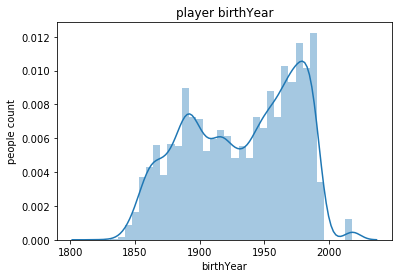

In [36]:
%matplotlib inline
sns.distplot(master.birthYear.fillna(2018))
plt.ylabel('people count')
plt.title('player birthYear')

可以看出1925年左右出生的球员 明显减少
经查证美国这个时间处于大萧条时期 （1929年至1933年之间发源于美国的经济危机)
可能经济低迷是参加人数减少的一大主要原因

##### 球员出生月分析

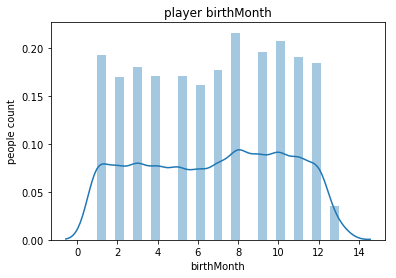

In [37]:
sns.distplot(master.birthMonth.fillna(13))
plt.ylabel('people count')
plt.title('player birthMonth')

为什么后8-1月出生人数比较多?
因为每年选秀在6月举行,春训于2月中开始,高中生只有毕业后才有资格(6月份毕业居多)
大概是因为报名时间的影响,所有在报名日这天,1-6月一部分人岁数未达标或许会受到影响
参考地址https://zh.m.wikipedia.org/zh-hans/美國職業棒球大聯盟

##### 球员使用手分析

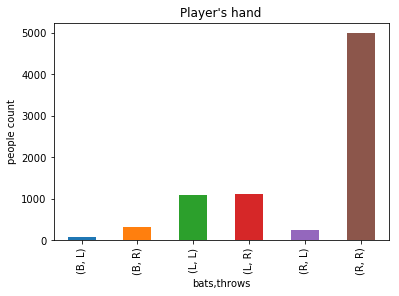

In [40]:
# throw = master.dropna().groupby(["bats","throws"])['playerID'].count().unstack().plot(kind = 'bar')
throw = master.dropna().groupby(["bats","throws"])['playerID'].count().plot(kind = 'bar')
plt.ylabel('people count')
plt.title('Player\'s hand')

可以直观的看出 bats 和 throws 都用右手的人最多

##### 球员身高体重分析

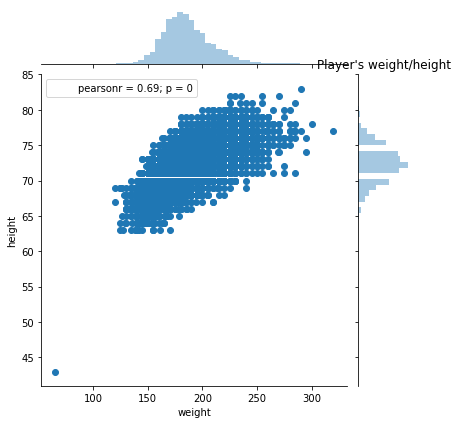

In [41]:
hw_data = master[['weight','height']].dropna()
sns.jointplot(hw_data.weight, hw_data.height)
plt.title('Player\'s weight/height')

身高体重除了有一个异常值(忽略), 其他都相对较为集中

##### 所有球队历年来发展分析

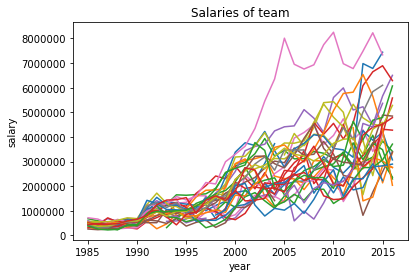

In [43]:
salaries_team = salaries.groupby(['teamID'])
for i, j in salaries_team:
    yearId = j.groupby(['yearID']).mean()
    plt.plot(yearId)

plt.xlabel('year')    
plt.ylabel('salary')
plt.title('Salaries of team')

##### 最佳团队分析

In [8]:
salaries_test = salaries.groupby(['teamID','yearID']).mean()
max_team =  salaries_test['salary'].idxmax()
print max_team, salaries_test.max()

('NYA', 2010) salary    8253335.56
dtype: float64


#### 2016年team 薪资数据展示

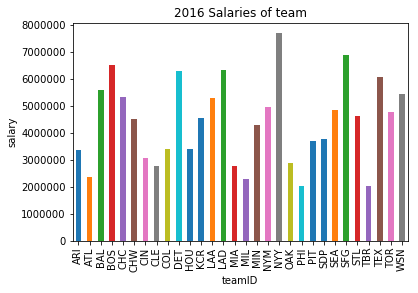

In [44]:
salaries_2016_team = salaries_2016.groupby('teamID').salary.mean()
salaries_2016_team.plot(kind = 'bar')
plt.ylabel('salary')
plt.title('2016 Salaries of team')

通过图表可以看出 有一个球队在2000-2015都别突出,
通过求得年均最大值
得到这个球队ID 是 NYA, 在2010年达到最高峰,均值为8253335.56
但比较奇怪的是 2016年最高均值的是NYY,
而且NYY是从2016年开始有数据的,
恰巧NYA2016年没有数据?

#### 异常数据分析

In [10]:
salaries_2016 = salaries[salaries['yearID'] == 2016]
salaries_2016_NYY = salaries_2016[salaries_2016['teamID'] == 'NYY']

salaries_2015 = salaries[salaries['yearID'] == 2015]
salaries_2015_NYA = salaries_2015[salaries_2015['teamID'] == 'NYA']

salaries_2014 = salaries[salaries['yearID'] == 2015]
salaries_2014_NYA = salaries_2014[salaries_2014['teamID'] == 'NYA']

print len(salaries_2016_NYY), len(salaries_2015_NYA) ,len(salaries_2014_NYA)
merge45 = pd.merge(salaries_2014_NYA,salaries_2015_NYA,on = ['playerID'])
merge56 = pd.merge(salaries_2016_NYY,salaries_2015_NYA,on = ['playerID'])
print len(merge56) , len(merge45)


29 29 29
16 29


15年NYY有30个球员,16年NYA有20个球员, 两个team 有16个球员ID相同的,
经调查发现 2015纽约扬基队(NYY) 认识人员变动很大,退休人数达到20人, 我为人NYY 和 NYA为同一个团队,但并未找到更改ID的原因

##### 2016年球员薪资分析

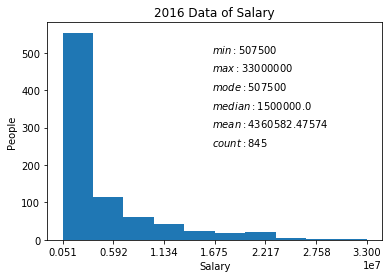

In [11]:
import matplotlib.pyplot as plt
maxNum = finalyData['salary'].max()
minNum = finalyData['salary'].min()
meanNum = finalyData['salary'].mean()
modeNum = finalyData['salary'].mode().values[0]
medianNum = finalyData['salary'].median()

new_ticks = np.linspace(minNum,maxNum,7)
plt.xticks(new_ticks)

plt.hist(finalyData['salary'])
plt.xlabel('Salary')
plt.ylabel('People')
plt.title('2016 Data of Salary')

plt.text(maxNum/2,500,r'$min:%s$'%minNum)
plt.text(maxNum/2,450,r'$max:%s$'%maxNum)
plt.text(maxNum/2,400,r'$mode:%s$'%modeNum)
plt.text(maxNum/2,350,r'$median:%s$'%medianNum)
plt.text(maxNum/2,300,r'$mean:%s$'%meanNum)
plt.text(maxNum/2,250,r'$count:%s$'%len(finalyData))

plt.show()


#### 球员获得的薪资占比情况分析

In [12]:
sort_data = finalyData.sort_values(by='salary', ascending=False)
before_20_num = int(round((0.2 * len(sort_data)),0))

sum_salary = sort_data['salary'].sum()
before_20_salary = sort_data.iloc[0:before_20_num,:]['salary'].sum()
proportion = round(before_20_salary * 1.0 /sum_salary,2)
print proportion  #0.66

0.66


 得出结论20%的人掌握了薪资总和的66%,虽然离 人们常说的80%有些差距, 但还是说明了社会资产分配中 小部分人掌握了大部分的财富
 此图可以直观的看出一多半人拿到的薪资在最低值附近, 月薪越高, 人数越少
也说明了 竞争是个很激烈的过程,但是你每往上走一步,你的竞争对手反而越少

## 到底什么在影响薪资呢?

##### 出生年/出生月 和薪资关系分析

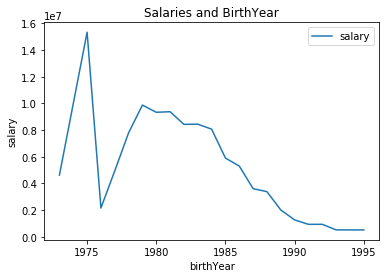

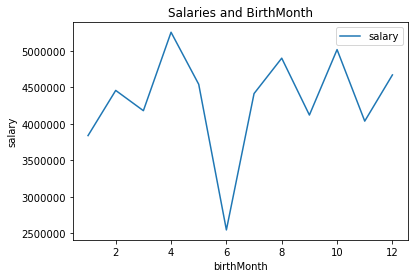

In [46]:
salaries_borthYear = finalyData.groupby('birthYear').mean()
salaries_borthYear.plot(y= 'salary')
plt.ylabel('salary')
plt.title('Salaries and BirthYear')
salaries_birthMonth = finalyData.groupby('birthMonth').mean()
salaries_birthMonth.plot(y = 'salary')
plt.ylabel('salary')
plt.title('Salaries and BirthMonth')

6月份出生的球员薪资最低,可能是6月份进来的球员,刚好在当界属于最小的那一个,也会影响到后期发展把

##### 身高体重与薪资的关系分析

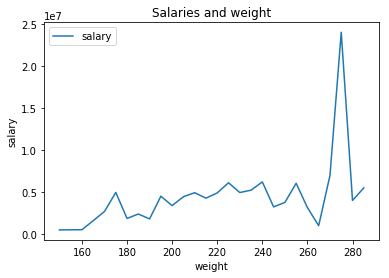

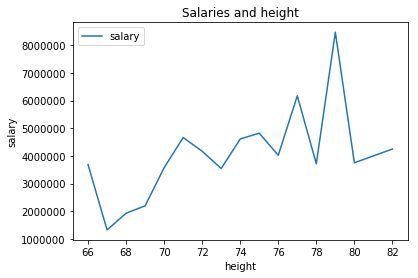

In [47]:
salaries_weight = finalyData.groupby('weight').mean()
salaries_weight.plot(y = 'salary')
plt.ylabel('salary')
plt.title('Salaries and weight')

salaries_height = finalyData.groupby('height').mean()
salaries_height.plot(y = 'salary')
plt.ylabel('salary')
plt.title('Salaries and height')

身高体重数值越大,薪资越高,力大无穷吗? 
是有钱了就吃胖了, 还是吃胖了就有钱了

##### 使用手与薪资的关系分析

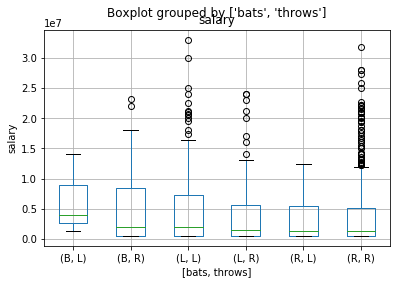

In [15]:
finalyData.boxplot(by = ['bats','throws'],column = 'salary')
plt.ylabel('salary')

图中可以看出 同手的人,薪资更有可能突出

# 总结

通过以上分析, 可以得出以下结论: 

   在球员分析和团队趋势分析中使用了1985-2016年的数据,数据量为2万左右,虽然不能代表全队美国棒球球员信息,
   但我认为此数据量的分析误差应该还是表较小
   在分析球员薪资中只使用了2016年的846个数据,样本数据量不够大,而且使用的是单一参数与薪资进行比较,
   这种分析结果会产生很大的误差
   
   球员分析
    1.球员出生年份,1925年左右明显减少, 是被美国大萧条时期(1929年至1933年)所影响,每年参与棒球的人数总体还是呈上升趋势
    2.球员出生月份8-1月最多,我觉得可能的原因是 因为选举日期 与 美国年龄的计算方法 所影响吧
    3.球员中,bats 和 throws 都用右手的人最多
    4.球员身高体重 相对较集中,但高体重可以是低体重的2倍, 所有可能身高体重并不会影响你称为棒球球员
    
   团队趋势分析
    1.上述数据可能很明显的看出NYY这个团队从 2000年到15年有明显的优势,但趋势目前是在固定范围内波动,
      其他全队处于慢速上升阶段,
      中途有个意外NYY数据在2016消失,另一个NYA团队出现,根据分析, 应该为同一团队,在2016更换了一部分球员
      NYY后期走势让人期待,是更换完球员后继续增长,还是被其他团队反超
  
  薪资分析
    1. 通过2016年薪资数据 得出结论20%的人掌握了薪资总和的66%,虽然离 人们常说的80%有些差距,
       但还是说明了社会资产分配中 小部分人掌握了大部分的财富
    2.薪资最高的是1975年左右的球员,这些球员都在43岁左右了,管理层了
    3.6月份球员的薪资最低
    4.身高体重数值越大,薪资越高
    5.bats,throws 同手的人能拿到高薪资概率更大
    